## Some more ```spaCy``` and ```pandas```

In [1]:
import os
import spacy

# Initialize spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
type(nlp)

spacy.lang.en.English

In [3]:
example = "This is a sentence written in English"

In [4]:
doc = nlp(example)

In [5]:
type(doc)

spacy.tokens.doc.Doc

In [6]:
for token in doc:
    print(token.text, token.pos_, token.tag_, token.lemma_)

This DET DT this
is AUX VBZ be
a DET DT a
sentence NOUN NN sentence
written VERB VBN write
in ADP IN in
English PROPN NNP English


__Reading data with ```pandas```__

In [7]:
import pandas as pd
from pathlib import Path

In [8]:
in_file = Path.cwd().parent / "data" / "labelled_data" / "fake_or_real_news.csv"

In [9]:
data = pd.read_csv(in_file)

In [10]:
del data["Unnamed: 0"]

In [11]:
data.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

__Filter on columns__

In [13]:
data["label"]=="FAKE"

0        True
1        True
2       False
3        True
4       False
        ...  
6330    False
6331     True
6332     True
6333    False
6334    False
Name: label, Length: 6335, dtype: bool

In [14]:
fake_news_df = data[data["label"]=="FAKE"]
real_news_df = data[data["label"]=="REAL"]

__Counting features in data__

In [15]:
# Create counters
adj_count = 0

# process texts in batch
for doc in nlp.pipe(fake_news_df["title"], batch_size=500):

    for token in doc:

        if token.tag_ == "JJ":

            adj_count += 1

In [16]:
counter = 0

test_list = range(0,100)

In [17]:
for entry in test_list:
    counter += entry

In [18]:
print(counter)

4950


## Sentiment with ```spaCy```

In [19]:
from spacytextblob.spacytextblob import SpacyTextBlob

In [20]:
nlp = spacy.load('en_core_web_sm')
spacy_text_blob = SpacyTextBlob()
nlp.add_pipe(spacy_text_blob)

In [31]:
text_file = Path.cwd().parent / "data" / "100_english_novels" / "corpus" / "Woolf_Lighthouse_1927.txt"
text_file

WindowsPath('c:/Users/z6hjb/OneDrive - KMD/projects/UNI/language_analytics_cds/data/100_english_novels/corpus/Woolf_Lighthouse_1927.txt')

In [34]:
text = text_file.read_text(encoding="utf-8")

In [35]:
print(text[:10000])

﻿To the Lighthouse


THE WINDOW


1


"Yes, of course, if it's fine tomorrow," said Mrs. Ramsay. "But you'll
have to be up with the lark," she added.

To her son these words conveyed an extraordinary joy, as if it were
settled, the expedition were bound to take place, and the wonder to which
he had looked forward, for years and years it seemed, was, after a night's
darkness and a day's sail, within touch. Since he belonged, even at the
age of six, to that great clan which cannot keep this feeling separate
from that, but must let future prospects, with their joys and sorrows,
cloud what is actually at hand, since to such people even in earliest
childhood any turn in the wheel of sensation has the power to crystallise
and transfix the moment upon which its gloom or radiance rests, James
Ramsay, sitting on the floor cutting out pictures from the illustrated
catalogue of the Army and Navy stores, endowed the picture of a
refrigerator, as his mother spoke, with heavenly bliss. It was fringe

In [36]:
doc = nlp(text)

In [37]:
polarity = []

for sentence in doc.sents:
    score = sentence._.sentiment.polarity
    polarity.append(score)

In [38]:
polarity[:10]

[0.0,
 0.0,
 0.4166666666666667,
 0.0,
 0.5666666666666667,
 0.4,
 -0.18333333333333332,
 0.8,
 0.4,
 0.0006926406926406867]

In [39]:
import matplotlib.pyplot as plt

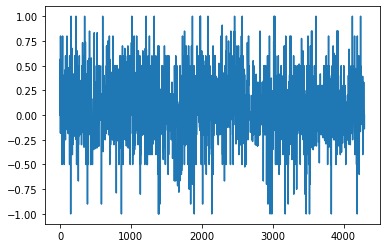

In [40]:
plt.plot(polarity)

In [46]:
smoothed_sentiment = pd.Series(polarity).rolling(500).mean()

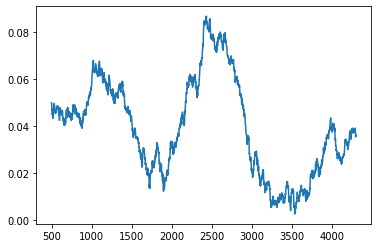

In [47]:
plt.plot(smoothed_sentiment)